In [1]:
#Load all the essential packages for the analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

#Font settings
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath, amssymb}"

In [ ]:
# Create subsets Omni-MATH-2-Filtered and Omni-MATH-2-Tagged
omni_math_2 = pd.read_json("Omni-Math-2.jsonl", lines=True)

omni_math_2_tagged = omni_math_2[omni_math_2['tags'].apply(lambda x: len(x) > 0)]
#omni_math_2_tagged.to_json("Omni-Math-2-Tagged.jsonl", lines=True, orient='records')

omni_math_2_filtered = omni_math_2[omni_math_2['tags'].apply(lambda x: len(x) == 0)]
#omni_math_2_filtered.to_json("Omni-Math-2-Filtered.jsonl", lines=True, orient='records')


# Figure 3

In [5]:
from utils import get_dataframe_reasoning_models, get_dataframe_gpt5mini
from compute_granular_performance import compute_granular_performance


#------------------------------------ TOTAL PERFORMANCE ------------------------------------#
# With Omni-Judge as a judge
df_gpt5 = get_dataframe_reasoning_models('gpt5/gpt5_filtered_judged_by_oj.jsonl', 'Omni-Math-2-Filtered.jsonl')
df_claude = get_dataframe_reasoning_models('claude/claude_filtered_judged_by_oj.jsonl', 'Omni-Math-2-Filtered.jsonl')
df_deepseek = get_dataframe_reasoning_models('deepseek/deepseek_filtered_judged_by_oj.jsonl', 'Omni-Math-2-Filtered.jsonl')
df_kimi = get_dataframe_reasoning_models('kimi/kimi_filtered_judged_by_oj.jsonl', 'Omni-Math-2-Filtered.jsonl')
df_gemini = get_dataframe_reasoning_models('gemini/gemini_filtered_judged_by_oj.jsonl', 'Omni-Math-2-Filtered.jsonl')
# With GPT-5 mini as a judge
df_gpt5_2 = get_dataframe_gpt5mini('gpt5/gpt5_filtered_judged_by_gpt5mini.jsonl')
df_claude_2 = get_dataframe_gpt5mini('claude/claude_filtered_judged_by_gpt5mini.jsonl')
df_deepseek_2 = get_dataframe_gpt5mini('deepseek/deepseek_filtered_judged_by_gpt5mini.jsonl')
df_kimi_2 = get_dataframe_gpt5mini('kimi/kimi_filtered_judged_by_gpt5mini.jsonl')
df_gemini_2 = get_dataframe_gpt5mini('gemini/gemini_filtered_judged_by_gpt5mini.jsonl')

#------------------------------------ GRANULAR PERFORMANCE ------------------------------------#
df_domain, df_difficulty = compute_granular_performance()
df_domain_pivot = df_domain.pivot(index='model', columns='domain', values='accuracy_difference')
df_difficulty_pivot = df_difficulty.pivot(index='model', columns='difficulty', values='accuracy_difference')

Number of Calculus problems: 203
Number of Algebra problems: 1876
Number of Tier 4 problems: 950


<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_20589/1107594341.py:10: SyntaxWarning: invalid escape sequence '\%'
  axM['a'].set_xlabel('Accuracy (\%)', fontsize=7)
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_20589/1107594341.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Colorbar min: -12.0, max: 12.0


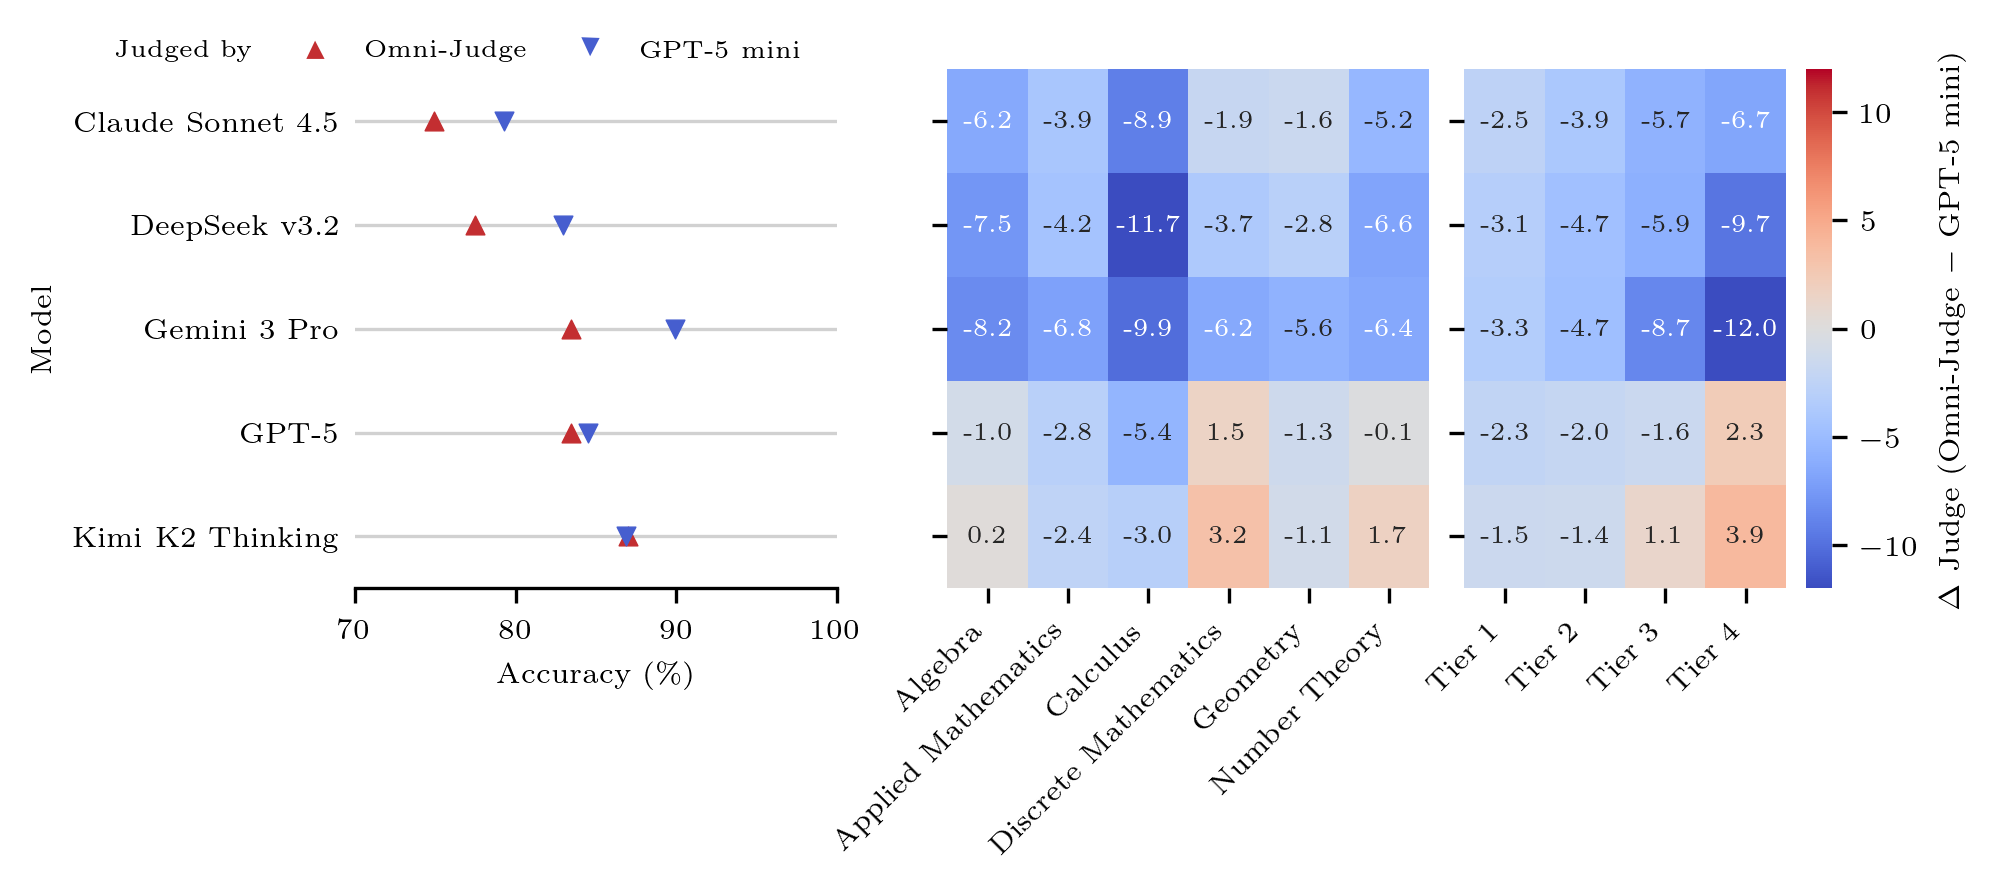

In [69]:
FigureM, axM = plt.subplot_mosaic([['a', '.', 'b', 'c']], figsize=(6.5, 9/4), dpi=300, gridspec_kw={'height_ratios': [1],'width_ratios': [6, 0.5, 6, 5], 'wspace':0.1}, sharey=True)

palette = sns.color_palette("coolwarm", 24)


sns.scatterplot( y=[0.5,1.5,2.5,3.5,4.5], x=[df_claude['score'].mean(), df_deepseek['score'].mean(), df_gemini['score'].mean(), df_gpt5['score'].mean(), df_kimi['score'].mean()], ax = axM['a'], color=palette[23], s=20, label='', zorder=10, marker='^', edgecolor=None)
sns.scatterplot( y=[0.5,1.5,2.5,3.5,4.5], x=[df_claude_2['judged_correct'].mean(), df_deepseek_2['judged_correct'].mean(), df_gemini_2['judged_correct'].mean(), df_gpt5_2['judged_correct'].mean(), df_kimi_2['judged_correct'].mean()], ax = axM['a'], color=palette[0], s=20, label='', zorder=10, marker='v', edgecolor=None)

axM['a'].set_ylabel('Model', fontsize=7)
axM['a'].set_xlabel('Accuracy (\%)', fontsize=7)
axM['a'].set_title('', fontsize=7)
axM['a'].tick_params(axis='x', labelsize=7)
axM['a'].tick_params(axis='y', labelsize=7)
axM['a'].set_xticks([ 0.7, 0.8, 0.9, 1], labels = [ '70%','80%', '90%', '100%'])
axM['a'].tick_params(axis='y', length=0)

sns.despine(ax=axM['a'], right=True, top=True, left=True)
axM['a'].grid(axis='y', linestyle='-', linewidth=0.8, color='#D1D1D1')

sns.heatmap(df_domain_pivot, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Judge Difference'}, center=0, ax=axM['b'], cbar=False, annot_kws={"fontsize": 6})

axM['b'].set_xticklabels(axM['b'].get_xticklabels(), rotation=45, ha='right')
axM['b'].tick_params(axis='x', labelsize=7)
axM['b'].tick_params(axis='y', labelsize=7)
axM['b'].set_yticklabels([])

axM['b'].set_ylabel('')
axM['b'].set_xlabel('')

sns.heatmap(df_difficulty_pivot, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Judge Difference'}, center=0, ax=axM['c'], annot_kws={"fontsize": 6}, vmin=-12, vmax=12)
axM['c'].set_ylabel('')
axM['c'].set_xlabel('')
axM['c'].set_yticklabels([])
axM['c'].set_xticklabels(axM['c'].get_xticklabels(), rotation=45, ha='right')
axM['c'].tick_params(axis='x', labelsize=7)

axM['a'].set_yticks([0.5,1.5,2.5,3.5,4.5], labels = ['Claude Sonnet 4.5', 'DeepSeek v3.2', 'Gemini 3 Pro', 'GPT-5','Kimi K2 Thinking' ])
cbar = axM['c'].collections[0].colorbar
color_min = cbar.vmin
color_max = cbar.vmax
print(f"Colorbar min: {color_min}, max: {color_max}")
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_yticks([-10,-5, 0,5,10])
cbar.ax.set_ylabel(r'$\Delta$ Judge (Omni-Judge $-$ GPT-5 mini)', fontsize=7)

handles = [
    plt.Line2D([0], [0], marker='^', color='w', label='Omni-Judge', markerfacecolor=palette[23], markersize=6),
    plt.Line2D([0], [0], marker='v', color='w', label=r'GPT-5 mini', markerfacecolor=palette[0], markersize=6)
]
prefix = plt.Line2D([], [], linestyle='none', label='Judged by')
handles2 = [prefix] + handles
axM['a'].legend(handles=handles2, fontsize=6, frameon=False, loc='upper left', bbox_to_anchor=(-0.7, 1.1), edgecolor=None, ncols=3, handletextpad=1, columnspacing=1.5)
leg = axM['a'].get_legend()
leg.get_frame().set_facecolor("white")

plt.tight_layout()
plt.savefig('figure_main.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Figure 5

<>:67: SyntaxWarning: invalid escape sequence '\%'
<>:67: SyntaxWarning: invalid escape sequence '\%'
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_20589/1415783618.py:67: SyntaxWarning: invalid escape sequence '\%'
  ax['a'].text(0.38, 0.02, f"Judge agreement {judge_agreement.mean()*100:.0f}\%", transform=ax['a'].transAxes, verticalalignment='bottom', fontsize=6)


247
222
Judge agreement on estimation problems: 88.00% (44 out of 50)


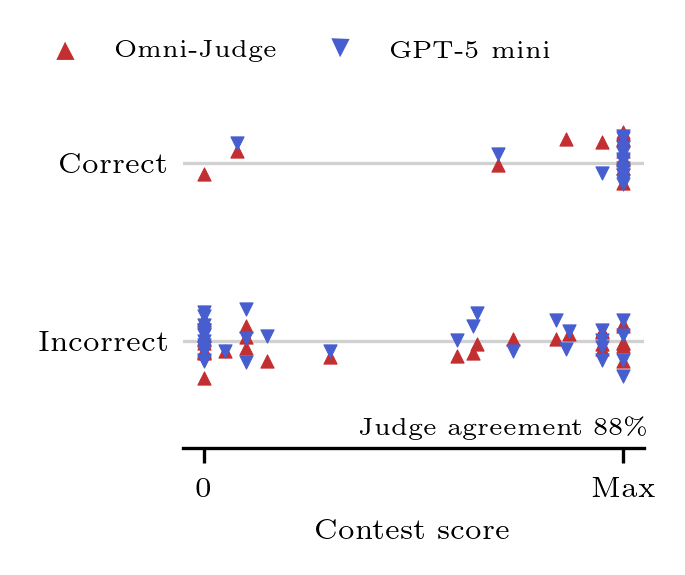

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
palette = sns.color_palette("coolwarm", 24)


gpt5_bad_problems = pd.read_excel("gpt5_tagged_to_annotate.xlsx")
print(len(gpt5_bad_problems))
# Exclude the should delete problems
gpt5_bad_problems = gpt5_bad_problems[gpt5_bad_problems['tags'].astype(str).str.contains('should delete') == False].copy() # check of dit oke is
print(len(gpt5_bad_problems))
#judge_agreement = (gpt5_bad_problems["score_omni_judge"] == gpt5_bad_problems["score_gpt5mini"])
#print(f"Judge agreement on estimation problems: {judge_agreement.mean()*100:.2f}% ({judge_agreement.sum()} out of {len(judge_agreement)})")

# Estimation subset + numeric contest score
est = gpt5_bad_problems[gpt5_bad_problems["tags"].astype(str).str.contains("estimation", na=False)].copy()
judge_agreement = (est["score_omni_judge"] == est["score_gpt5mini"])
print(f"Judge agreement on estimation problems: {judge_agreement.mean()*100:.2f}% ({judge_agreement.sum()} out of {len(judge_agreement)})")
est["contest_score"] = pd.to_numeric(est["real score"], errors="coerce")
est = est[est["contest_score"].notna()].copy()  # keep only items with contest scoring

est["normalised_score"] = est["contest_score"] / est["Max score"]

fig, ax = plt.subplot_mosaic([['a']], figsize=(6.5/3, 9/5), dpi=300, constrained_layout=True)

# x positions for exact-match outcome (shared for both judges)
xpos = {0: 0, 1: 0.5}  # 0=Incorrect, 1=Correct
ax['a'].set_yticks([0, 0.5], ["Incorrect", "Correct"], fontsize=7)
ax['a'].set_ylim(-0.3, 0.8)
ax['a'].tick_params(axis='y', length=0)
ax['a'].grid(axis='y', linestyle='-', linewidth=0.8, color='#D1D1D1', zorder=1)

# Two judges: fixed color per judge, small horizontal offsets + jitter
rng = np.random.default_rng(0)
judge_specs = [
    ("score_omni_judge", -0, "Omni-Judge"),
    ("score_gpt5mini",   +0, "GPT-5 mini"),
]

# assign two distinct default-cycle colors (no hardcoding)
colors = [palette[23], palette[0]]
markers = ['^', 'v']
judge_specs = [(col, off, lab, colors[i], markers[i]) for i, (col, off, lab) in enumerate(judge_specs)]

for col, offset, label, color, marker in judge_specs:
    for outcome in [0, 1]:
        y = est.loc[est[col] == outcome, "normalised_score"].to_numpy()
        x = np.full(len(y), xpos[outcome] + offset) + rng.normal(0, 0.045, size=len(y))
        sns.scatterplot(
            x=y, y=x,
            s=10,
            color=color, 
            marker=marker,  
            edgecolor=None, ax=ax['a'] , zorder=2                   # SAME color for all points of this judg,  # legend once per judge
        )

#ax.axhline(0, linewidth=1.0, color='black', alpha=0.5)
#ax.set_xlim(-0.45, 1.45)
#ax.set_ylim(-1, 31)
ax['a'].set_xlabel("Contest score", fontsize=7) 
ax['a'].set_xticks([0, 1])
ax['a'].set_xticklabels(['0', 'Max'])
#ax.set_xlim(0,30)
ax['a'].tick_params(axis='x', labelsize=7)
sns.despine(right=True, top=True, left=True, ax=ax['a'])
ax['a'].set_title("")
ax['a'].text(0.38, 0.02, f"Judge agreement {judge_agreement.mean()*100:.0f}\%", transform=ax['a'].transAxes, verticalalignment='bottom', fontsize=6)


handles = [
    plt.Line2D([0], [0], marker='^', color='w', label='Omni-Judge', markerfacecolor=palette[23], markersize=6),
    plt.Line2D([0], [0], marker='v', color='w', label='GPT-5 mini', markerfacecolor=palette[0], markersize=6)
]
ax['a'].legend(handles=handles, fontsize=6, frameon=False, loc='upper left', ncol=1, bbox_to_anchor=(-0.36, 1.1), edgecolor=None, ncols=2, handletextpad=1, columnspacing=1.5)

fig.savefig("estimation.pdf", bbox_inches="tight", dpi=300)
plt.show()

# fig.savefig("estimation_twojudge_jitter_samecolor.png", dpi=300, bbox_inches="tight")

